# Exploratory Data Analysis

## Load Required Libraries

In [1]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For data importing
import os

In [2]:
## (Optional chunk)
# Current session information
import session_info
session_info.show(dependencies=False)

## Load data

Files of interest:
- `weir_calibration.csv` includes calibration points for the weir
- `bci_lutzweir_combined.csv` includes raw runoff measurement, corrected runoff measurement, data source (*Chart measurements can be removed)
- `bci_cl_ra_elect2.CSV` has corrected rainfall (`ra`) in mm with measurements of `0` as `NA`s (`bci_cl_ra_elect.csv` has `0`s)
- `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv` have soil moisture measurements (water by wet weight and water by dry weight; one can be chosen for analysis as they are linearly related)
<!-- `bci_cl_ra_elect.csv` has corrected rainfall (`ra`) in mm, contains `0`s (large file) -->

All values level values are in mm, and datetime is in UTC-5 (Panama time zone).


### Import

In [3]:
## Calibrations dataset
data_calibrations = pd.read_csv(
    "data/weir_calibration.csv",
    # nrows = 10000,
    usecols = ['datetime', 'weir_level'], # weir_hour is a repeat of the time in datetime and can be skipped
    parse_dates=['datetime'],
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
    # dtype = {'datetime': 'datetime', 'weir_level': 'int'}
)

data_calibrations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6465 entries, 1994-01-03 08:46:00 to 2025-09-02 08:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weir_level  6465 non-null   int64
dtypes: int64(1)
memory usage: 101.0 KB


In [4]:
# Combined data
# # Checking if the dataset is already loaded into the workspace
# try:
#     if data_combined.empty == False:
#         print("Data loaded, random sample shown below")
#         print(data_combined.sample(n=5))
# except NameError:
#     print("Data has not yet been read in, loading now...")
#     data_combined = pd.read_csv(
#         "data/bci_lutzweir_combined.csv",
#         usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_combined = pd.read_csv(
    "data/bci_lutzweir_combined.csv",
    usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
    parse_dates=['datetime'],
    dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3951119 entries, 1972-01-01 01:00:00 to 1977-03-06 23:45:00
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   level     float64 
 1   raw       float64 
 2   chk_note  category
 3   chk_fail  object  
 4   comment   object  
 5   source    category
dtypes: category(2), float64(2), object(2)
memory usage: 158.3+ MB


In [5]:
# rainfall

# This data set includes the 0 readings
# data_rainfall_zeroes = pd.read_csv(
#         "data/bci_elect_cl_ra/bci_cl_ra_elect.csv",
#         usecols = ['datetime', 'ra', 'raw', 'chk_note', 'chk_fail'],
#         # "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
#         # usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'chk_note':'category', 'chk_fail':'str'},
#         # dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_rainfall = pd.read_csv(
    "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
    parse_dates=['datetime'],
    dtype = {'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179640 entries, 1929-01-02 08:00:00 to 2025-08-04 11:55:00
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ra        179640 non-null  float64 
 1   raw       179640 non-null  float64 
 2   chk_note  179640 non-null  category
 3   chk_fail  29 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ MB


In [6]:
# soil

# `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv`

pd.read_csv("data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv", nrows=20)

data_soil_shallow = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    parse_dates=['date'],
    # nrows=10,
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)


data_soil_deep = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    parse_dates=['date'],
    # nrows=10,
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# print(data_soil_shallow['sample'].value_counts(dropna = False))
# print(data_soil_shallow['depth'].value_counts(dropna = False))
# print(data_soil_deep['depth'].value_counts(dropna = False))
# print(data_soil_deep['sample'].value_counts(dropna = False))

data_soil_shallow.info()
data_soil_deep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18556 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       18556 non-null  category
 1   sample      18556 non-null  category
 2   h2o_by_wet  18556 non-null  float64 
 3   chk_note    18556 non-null  category
 4   chk_fail    178 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15637 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       15637 non-null  category
 1   sample      15637 non-null  category
 2   h2o_by_wet  15637 non-null  float64 
 3   chk_note    15637 non-null  category
 4   chk_fail    20 non-null     object  
dtypes: category(3), float64(1), object(1)
memory usage: 413.4+ KB


## Cleanup

In [ ]:
# Get earliest and latest dates of sources
cat_source = data_combined['source'].unique().tolist()
# print(cat_source)
for cat in cat_source:
    if pd.isna(cat) == True:
        temp_subset = data_combined[data_combined["source"].isnull()]
    else:
        temp_subset = data_combined[data_combined["source"]==cat]
    print(min(temp_subset['datetime']), "", max(temp_subset['datetime']), cat)

# Save space, remove no longer needed items
del cat_source, cat, temp_subset

In [ ]:
print(data_combined.dtypes)
print(data_combined.sample(n=25))
print("Source:", data_combined['source'].cat.categories.tolist())
print("Notes:", data_combined['chk_note'].cat.categories.tolist())
print("Fail mode:", data_combined['chk_fail'].unique())
print("Comments:", data_combined['comment'].unique())

In [ ]:
data_combined_nochart = data_combined[~data_combined['source'].str.contains("CHART", na=False)]
# data_combined_nochart['date'] = data_combined_nochart['datetime'].dt.date
# data_combined_nochart = data_combined_nochart.set_index('datetime')
data_combined_nochart

## General Variable Exploration

In [ ]:
# data_combined.loc['2000-01-01':'2001-02-01']
# data_combined
data_combined_nochart = data_combined[~data_combined['source'].str.contains("CHART", na=False)]
data_combined_nochart = data_combined_nochart.sort_index()

# data_combined_nochart.loc['2000-01-01 00:00:01':'2001-02-01 00:00:01']

# date_start = '2000-01-01 00:00:01'
# date_end = '2000-01-01 23:59:59'



,level,raw,chk_note,chk_fail,comment,source
datetime,,,,,,
2000-01-01 02:02:00,190.80,-999.0,adjusted,Gap Fill,NaN,NaN
2000-01-01 02:21:00,179.40,-999.0,adjusted,Gap Fill,NaN,NaN
2000-01-01 02:33:00,176.20,-999.0,adjusted,Gap Fill,NaN,NaN
2000-01-01 02:52:00,169.90,-999.0,adjusted,Gap Fill,NaN,NaN
2000-01-01 03:04:00,167.35,-999.0,adjusted,Gap Fill,NaN,NaN
...,...,...,...,...,...,...
2001-01-31 23:40:00,30.60,30.6,good,NaN,NaN,ISCO
2001-01-31 23:45:00,30.10,30.1,good,NaN,NaN,ISCO
2001-01-31 23:50:00,30.20,30.2,good,NaN,NaN,ISCO


In [39]:
data_calibrations

,weir_level
datetime,
1994-01-03 08:46:00,47
1994-01-04 08:10:00,43
1994-01-05 09:04:00,42
1994-01-06 09:09:00,46
1994-01-07 08:31:00,41
...,...
2025-08-22 08:35:00,88
2025-08-25 08:45:00,88
2025-08-26 08:40:00,96


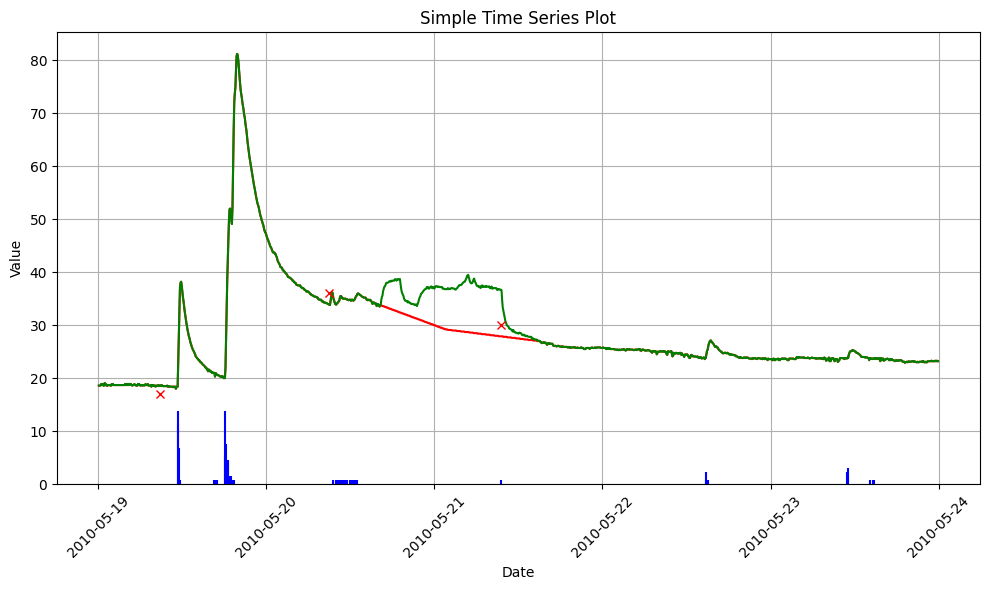

In [53]:
# data_combined_nochart.loc['2000-01-01 00:00:01':'2001-02-01 00:00:01']

date_start = '2010-05-19 00:00:01'
date_end = '2010-05-23 23:59:59'

data_subset = data_combined_nochart.loc[date_start:date_end]
data_subset_rain = data_rainfall.loc[date_start:date_end]
data_subset_cal = data_calibrations.loc[date_start:date_end]
# plt.figure(figsize = (10,6))
# plt.plot(data_subset.index, data_subset['raw'])

fig, ax = plt.subplots(figsize=(10, 6))
# ax.figure(figsize=(10, 6))
ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = "blue")
ax.plot(data_subset.index, data_subset['level'], color = "red")
ax.plot(data_subset.index, data_subset['raw'], color = "green")
ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color="red")
# plt.plot(data_subset_rain.index, data_subset_rain['ra']*3, color = "blue", linestyle='none', marker='o')
# plt.plot(data_calibrations.index, data_calibrations['level'], color = "red")
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Simple Time Series Plot')
ax.set_ylim(bottom=0) 
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# plt.figure(figsize=(10, 6))
# plt.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = "blue")
# plt.plot(data_subset.index, data_subset['level'], color = "red")
# plt.plot(data_subset.index, data_subset['raw'], color = "green")
# plt.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color="red")
# # plt.plot(data_subset_rain.index, data_subset_rain['ra']*3, color = "blue", linestyle='none', marker='o')
# # plt.plot(data_calibrations.index, data_calibrations['level'], color = "red")
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('Simple Time Series Plot')
# plt.xticks(rotation=45)
# plt.set_ylim(bottom=0) 
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# print('chk_note:', data_combined_sources['chk_note'].cat.categories.tolist())
# print('chk_fail:', data_combined_sources['chk_fail'].cat.categories.tolist())
# print('source:', data_combined_sources['source'].cat.categories.tolist())

# data_combined_sources[data_combined_sources['source']=='TROLL']
# data_combined_sources.T['source']
# data_combined_sources.sample(10)["source"]

# counts of each 'source' type
print(data_combined['chk_note'].value_counts(dropna = False))
print(data_combined['comment'].value_counts(dropna=False))
print(data_combined['source'].value_counts(dropna = False))

# data_combined.info()


In [ ]:
# data_combined.loc[data_combined['source']='CHART']
# print(data_combined.loc[data_combined['source'] == 'CHART']) # Selects rows where column 'A' is greater than 1
# data_combined.loc[data_combined['source'].isin(['CHART', 'CHART+AF'])]
# len(data_combined['source'].isin(['CHART', 'CHART+AF']).index.tolist())
# data_combined['source']